# Lab 5: James Lawson

<font size = '5' color='Red'>
Final score: 14.75/15
</font>

Part of this laboratory based on material you have learn in class. However, large portion of data scientists job is to studying documentation and researching additional materials. To make you prepared for such constantly changing data landscape, several problem in this lab will rely on functions and methods which hasn't been covered in class. Large portion of this assignment grade will be reflecting your ability to adapt a new functions and methods using documentation and/or online resources.

Directions:

Please compose your code in appropriate Jupyter Notebook cell below the problem desription. Make sure to provide printout in requested format.

Lab Policies:

  -  If your running your code lead to an error message, your grade for this code will be reduced by 100%.

  -  If your code does not produce the desired outcome due to error, your grade will be reduced by 90%.
  - To get full credit for each problem, your code should produce a neat and informative output. Depending on the problem, you will be ask to produce either informative printout or a graph. Each problem will require a written conclusion at the end. See specific details of printout/graphs/conclusion in individual problem descriptions.
  - For each question requesting a graph, make sure to label the graph axes (including units, if appropriate), and provide legends and titles.
  - To get a full credit for the test, all data frame manipupations has to be done algorythmially. Please avoid making any changes to origivnal nations.csv file, making a new data files or copy/paste/edit any data manually.

  -  You are welcome consult with your classmates and ANY online resources while working on this lab. Feel free to adapt any code from pre-class tutorials and workshops

# Data

For this test you will use the file **nations.csv** provided as an attachment to this exam. This file contains the data from the World Bank Indicators portal, which is an incredibly rich resource. The file has the following fields:
- **iso3c** Three-letter codes for each country, assigned by the International Organization for Standardization.
- **country** Country name.
- **year** a year of data collection
- **population** Estimated total population at mid-year, including all residents apart from refugees.
- **gdp_percap** Gross Domestic Product per capita in current international dollars, corrected for purchasing power in different territories.
- **life_expect**  Life expectancy at birth, in years.
- **birth_rate** Live births during the year per 1,000 people, based on mid-year population estimate.
- **neonat_mortal_rate** Neonatal mortality rate: babies dying before reaching 28 days of age, per 1,000 live births in a given year.
- **region** World Bank regions, explained [here](https://datahelpdesk.worldbank.org/knowledgebase/articles/906519).
- **income** World Bank income groups, explained [here](https://datahelpdesk.worldbank.org/knowledgebase/articles/906519).

## Problem 1: Life expectancy in US (5 pts.)

Download the file **nations.csv** into dataframe **df**. Remove all rows which have missing data.  Print the first 6 rows of **df**

In [1]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#data frame is loaded into df
df = pd.read_csv('nations.csv')

#rows with missing data are removed
df = df.dropna()

#first 6 rows are printed
display(df.head(6))

,iso3c,country,year,gdp_percap,life_expect,population,birth_rate,neonat_mortal_rate,region,income
25,ARE,United Arab Emirates,1991,73036.99661,72.012293,1913190.0,24.649,7.9,Middle East & North Africa,High income
26,ARE,United Arab Emirates,1993,71959.87787,72.573024,2127863.0,22.360,7.3,Middle East & North Africa,High income
27,ARE,United Arab Emirates,2001,83533.55522,74.712878,3217865.0,15.829,5.5,Middle East & North Africa,High income
28,ARE,United Arab Emirates,1992,73154.27774,72.296415,2019014.0,23.501,7.6,Middle East & North Africa,High income
29,ARE,United Arab Emirates,1994,74683.88859,72.845585,2238281.0,21.263,6.9,Middle East & North Africa,High income
30,ARE,United Arab Emirates,2007,75426.79351,76.111171,6010100.0,12.814,4.7,Middle East & North Africa,High income


Calculate number of new babies born in each country in each year, by adding a new column called 'babies' to the dataframe. Print the top 3 lines of the updatad dataframe.

In [2]:
#new column "babies" is created by multiplying column "birth_rate" by column "population" and dividing by 1,000
df['babies'] = df['birth_rate'] * df["population"] / 1000

#first 3 rows are printed
display(df.head(3))

,iso3c,country,year,gdp_percap,life_expect,population,birth_rate,neonat_mortal_rate,region,income,babies
25,ARE,United Arab Emirates,1991,73036.99661,72.012293,1913190.0,24.649,7.9,Middle East & North Africa,High income,47158.220310
26,ARE,United Arab Emirates,1993,71959.87787,72.573024,2127863.0,22.360,7.3,Middle East & North Africa,High income,47579.016680
27,ARE,United Arab Emirates,2001,83533.55522,74.712878,3217865.0,15.829,5.5,Middle East & North Africa,High income,50935.585085


Create a new data frame called **US** which contains life expectancy, population and birth rate of the United States. The **index** of this dataframe should be **year**.  Here is a brief illustration:

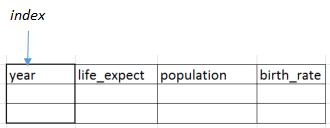

Print the top 4 rows of dataframe **US**

In [3]:
#new dataframe is created with the United States
US = df[df.country == 'United States']

#new dataframe is created from dataframe US
US_short = US

#index is set to year
US_short.set_index("year", inplace = True)

#columns that are not needed are deleted
US_short = US_short.drop(columns=["iso3c", 'country', 'gdp_percap', "neonat_mortal_rate", "region", "income", "babies"])

#first 4 rows are printed
display(US_short.head(4))

,life_expect,population,birth_rate
year,,,
2001,76.836585,284968955.0,14.1
2008,78.039024,304093966.0,14.0
2002,76.936585,287625193.0,14.0
1999,76.582927,279040000.0,14.2


Make a new plot illustrating the trends in life expectancy in United States vs. year over the entire time range contained in the dataset. You will want to first sort the rows of the **US** DataFrame by year (index, hence you will need to use sort_index instead of sort_values).

**As a reminder:** All of your plots should contain legible, informative axis labels and titles, as well as legends when appropriate.

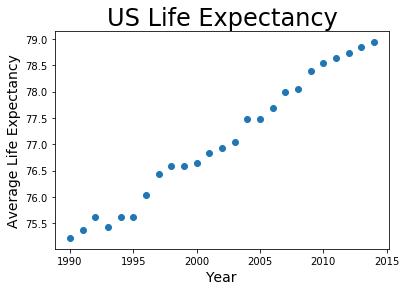

In [4]:
#sort the rows of the US data frame by year
US = US.sort_index()

#data is plotted
plt.scatter(US.index, US.life_expect)

#title is added
plt.title("US Life Expectancy", fontsize=24)

#x and y labels are added
plt.ylabel("Average Life Expectancy", fontsize=14)
plt.xlabel("Year", fontsize=14)

#scatterplot is displayed
plt.show()

Now let's compare life expectancy within the North American region. Re-organize your data in a new data frame which is indexed by year and which contains the life expectancy in all North American countries in columns. Print the top 5 rows of your North American Life expectancy data frame. **Hint**: A pivot table will serve well here to separate each country from the North America region into its own column. You can first create a dataframe containing just data for North American countries, and then pivot the table to pull the data for each country into its own column.

In [5]:
#life expectancy in the North American region
#data frame with just north american countries
NA = df[df.region == "North America"]

#pivot the table to pull the data for each country into its own column
NA = NA.pivot_table(index='year', columns='country', values='life_expect')

#first 5 rows are printed
display(NA.head(5))

country,Canada,United States
year,,
1990,77.377073,75.214634
1991,77.553415,75.365854
1992,77.320732,75.617073
1993,77.685122,75.419512
1994,77.861951,75.619512


Now let's examine the trends in life expectancy over time for all countries in the North American region. Make a new plot displaying life expectancies vs year for all countries in North America. **Hint:** Remember, you can plot directly from a DataFrame, which will automatically plot each of your columns and put them in a legend.

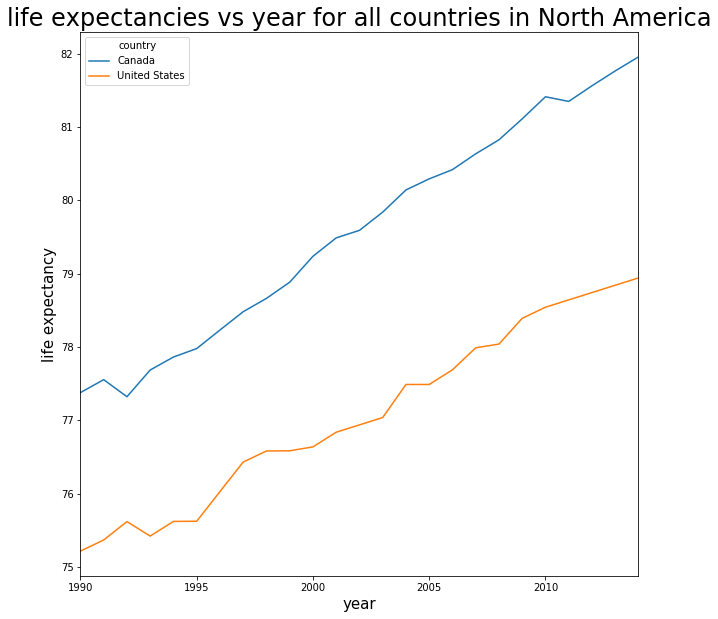

In [6]:
#data is plotted and fig size is set
NA.plot(figsize = (10, 10))
        
#title is added
plt.title("life expectancies vs year for all countries in North America", fontsize=24)

#axix labels
plt.xlabel('year', fontsize=15)
plt.ylabel('life expectancy', fontsize=15)

#plot is shown
plt.show()

###  Conclusion 1

Briefly (in 1-3 sentences) describe life expectancy trends in North America in recent years.

The Canadian life expectancy has historically been higher than the US life expectancy. Life expectancies for both countries has been rising for the past 30 years.

## Problem 2:  Life expectancy in different world regions (4 pts.)

Make a new data frame, called **df_reg**, which contains *mean* **life expectancy**  for all the **regions** in the dataframe indexed by **year**.  The image below illustrates the structure of the new data frame. **Hint:** A pivot table will once again serve us very well here, as it provides an easy way to pull out the data for particular columns.

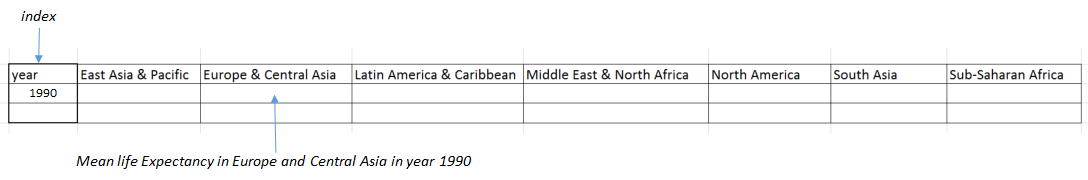

Print  top five rows of the dataframe **df_reg**

In [7]:
#new data frame is created using a pivot table
df_reg = df.pivot_table(index='year', columns='region', values='life_expect', aggfunc='mean')

#first 5 rows are printed
display(df_reg.head(5))

region,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,North America,South Asia,Sub-Saharan Africa
year,,,,,,,
1990,67.091507,72.259023,68.634132,67.710581,76.295854,58.801508,51.853014
1991,67.408328,72.221931,68.912167,68.094627,76.459634,59.329244,51.717125
1992,67.678871,72.304864,69.294647,68.441642,76.468902,59.850093,52.023373
1993,67.381123,72.257567,69.439463,68.829184,76.552317,60.358337,51.504972
1994,67.661286,72.357149,69.690795,69.167821,76.740732,60.854691,51.444161


Make a new plot illustrating the trends in mean life expectancy over time for all regions on the same plot. Again, we can plot directly from our DataFrame.

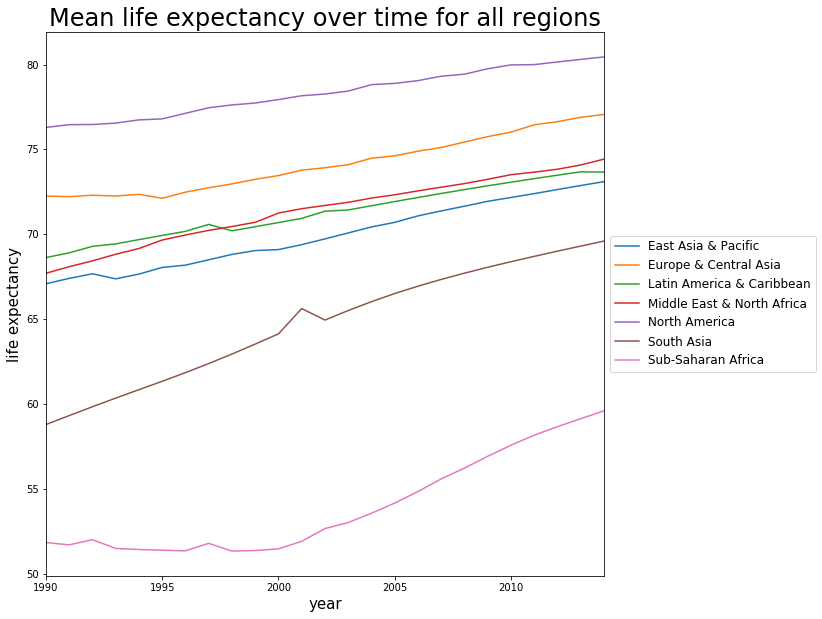

In [8]:
#data is plotted and the fig size is set
df_reg.plot(figsize = (10, 10))

#legend
plt.legend(prop = {"size": 12}, loc = "center left", bbox_to_anchor = (1, 0.5))
        
#title is added
plt.title("Mean life expectancy over time for all regions", fontsize=24)

#axix labels
plt.xlabel('year', fontsize=15)
plt.ylabel('life expectancy', fontsize=15)

#plot is shown
plt.show()

You probably noticed an increase in life expectancy in Sub-Saharian Africa in recent years. It has been speculated that an increase in income has contributed to this trend. Let's separate the countries in Sub-Saharian Africa by income, using the categorical variable **income**. Make a new plot illustrating the trends in life expectancy over time for different income categories in Sub-Saharan Africa on the same plot.  **Hint:** Start by making a new dataframe containing just the Sub-Saharan African countries, then pivot using year, income categories, and life expectancy, and by using an aggfunc to take the mean for each category for each year.

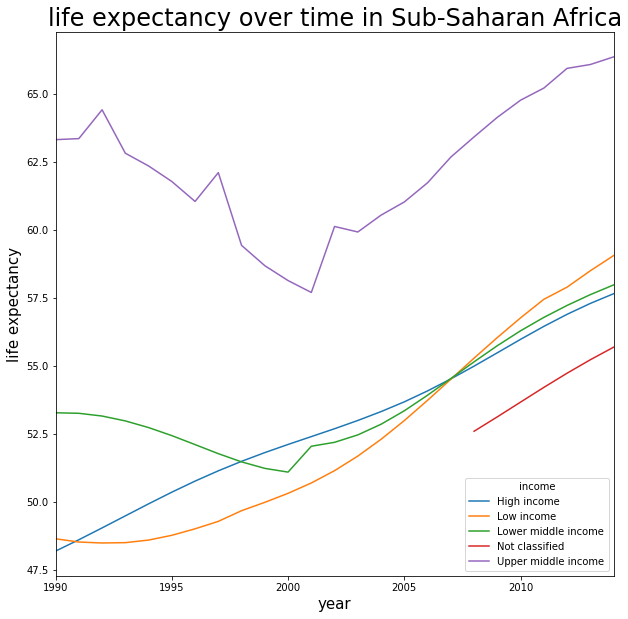

In [9]:
#new data frame with Sub-Saharan African countries
subSaharan = df[df.region == "Sub-Saharan Africa"]

#pivot table is created
subSaharanPivot = subSaharan.pivot_table(index='year' , columns='income', values='life_expect', aggfunc='mean')

#data is plotted and the fig size is set
subSaharanPivot.plot(figsize = (10, 10))
        
#title is added
plt.title("life expectancy over time in Sub-Saharan Africa", fontsize=24)

#axix labels
plt.xlabel('year', fontsize=15)
plt.ylabel('life expectancy', fontsize=15)

#plot is shown
plt.show()

## Conclusion 2

Briefly (in 2-5 sentences) summarize your findings on life expectancy in different region of the world, and the effect of income on life expectancy in sub-Saharan Africa.

In [10]:
# North America has the highest life expectancy while Sub-Saharan Africa has the lowest. All of the lines are upward 
# sloping which indicates an increase in life expectancy since 1990. In the second graph, my conculsion is that income 
# does not have a strong effect on life expectancy as all of the lines are close together and the highest income group 
# does not have the highest life expectancy.

## Problem 3:  Distrubution of newborn mortality (3 pts)

Let's explore the relationship between birth rate and newborn mortality in all countries. Plot a histogram of newborn mortality for the year 2010. Use 15 bins in your histogram.

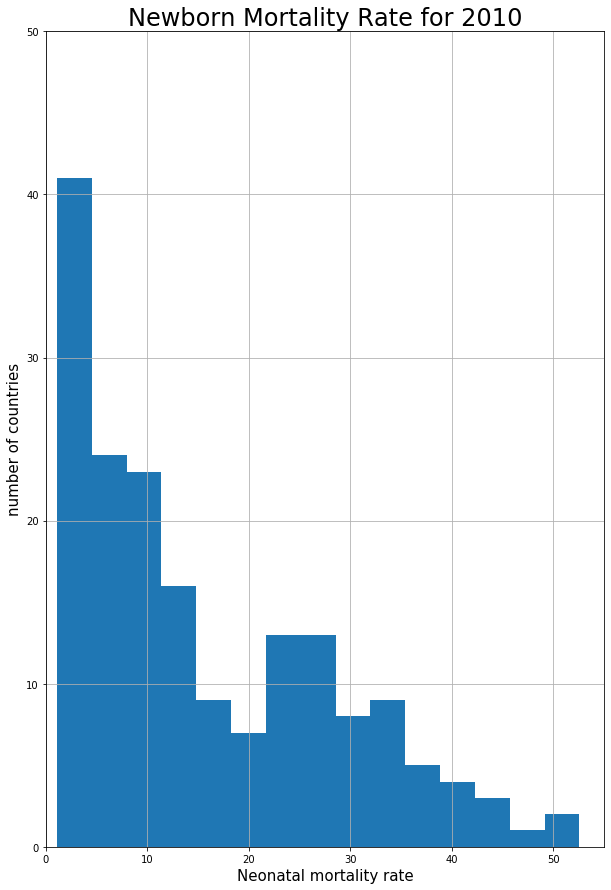

In [11]:
#figure size is set
plt.figure(figsize = (10, 15))

#make a dataframe with data from only 2010
year2010 = df[df.year == 2010]

#histogram is created
year2010['neonat_mortal_rate'].hist(bins=15)
        
#title is added
plt.title("Newborn Mortality Rate for 2010", fontsize=24)

#axix labels
plt.xlabel('Neonatal mortality rate', fontsize=15)
plt.ylabel('number of countries', fontsize=15)

#x and y limits are set
plt.ylim(0, 50)
plt.xlim(0, 55)

#plot is shown
plt.show()

<font size = '5' color='Red'>
When plotting stacked histograms, you need to specify a range() argument within your plt.hist() function so that all histograms will plot bins using the same start and end point. This allows for a more honest comparison between the distributions.

-1/4 point
</font>

It has been hypothesized that higher birth rates may contribute to infant mortality. Make a new histogram illustrating the trend for infant mortality only for countries with a birth rate **over 20** live births per thousand people. Make sure to keep  x- and y-axis ranges the same as in the previous histogram. Adjust the number of bins to roughly match the binwidth in the previous histogram.

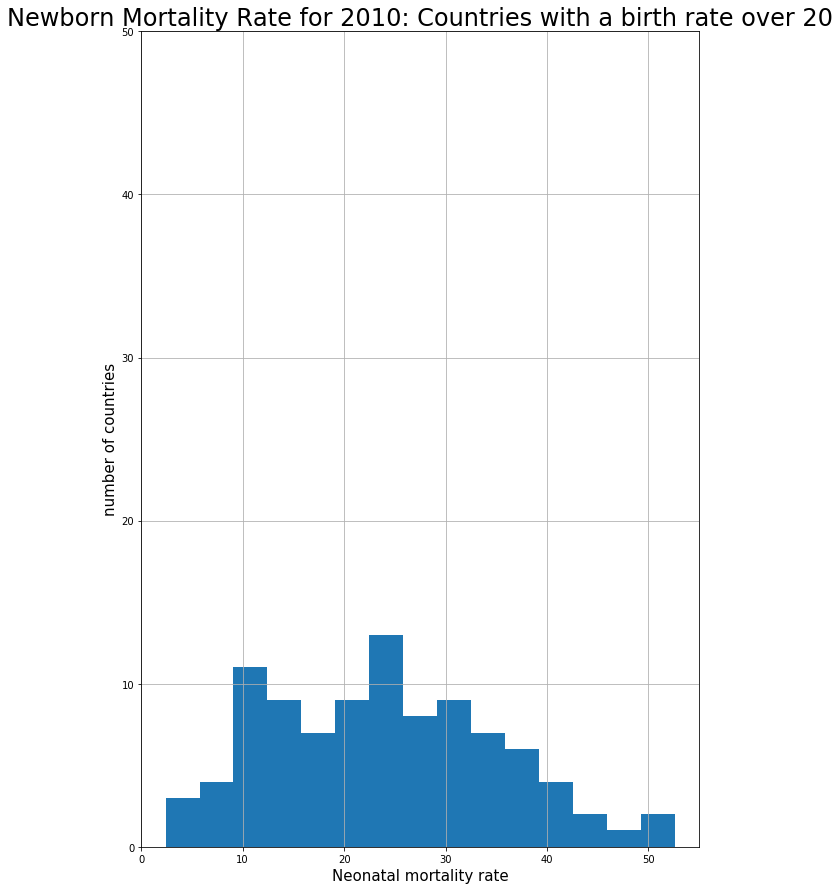

In [12]:
#figure size is set
plt.figure(figsize = (10, 15))

#new data frame only for countries with a birth rate over 20
year2010HighBirthRate = year2010[year2010.birth_rate > 20]

#histogram is created
year2010HighBirthRate['neonat_mortal_rate'].hist(bins=15)
        
#title is added
plt.title("Newborn Mortality Rate for 2010: Countries with a birth rate over 20", fontsize=24)

#axix labels
plt.xlabel('Neonatal mortality rate', fontsize=15)
plt.ylabel('number of countries', fontsize=15)

#x and y limits are set
plt.ylim(0, 50)
plt.xlim(0, 55)

#plot is shown
plt.show()

Next make a new histogram illustrating the trend for infant mortality only for countries with a birth rate **less than 20** live births per thousand people. Make sure to keep  x- and y-axis ranges the same as in the previous histogram. Adjust the number of bins to roughly match the binwidth in the previous histogram.

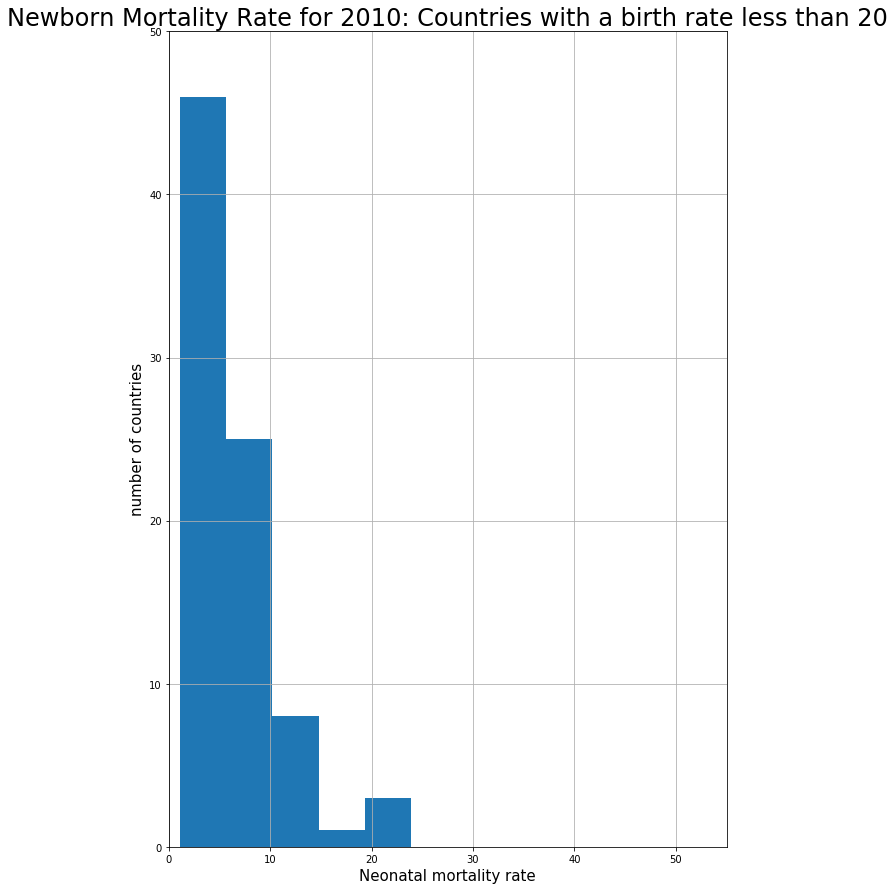

In [13]:
#figure size is set
plt.figure(figsize = (10, 15))

#new data frame only for countries with a birth rate over 20
year2010LowBirthRate = year2010[year2010.birth_rate < 20]

#histogram is created
year2010LowBirthRate['neonat_mortal_rate'].hist(bins=5)
        
#title is added
plt.title("Newborn Mortality Rate for 2010: Countries with a birth rate less than 20", fontsize=24)

#axix labels
plt.xlabel('Neonatal mortality rate', fontsize=15)
plt.ylabel('number of countries', fontsize=15)

#x and y limits are set
plt.ylim(0, 50)
plt.xlim(0, 55)

#plot is shown
plt.show()

## Conclusion 3:

Briefly (in 2-5 sentences) describe the distribution of infant mortality in all countries, as well as the trends in infant mortality for countries with large and small birth rates.

In [14]:
#Most countries have a very low Neonatal mortality rate. As the Neonatal mortality rate on the x axis increases, the less countries are in that column. 
#Countires with a birth rate of less than 20 generally have lower Neonatal mortality rate, while countries with a birth rate over 20 generally have higher Neonatal mortality rates.

## Problem 4: Effect of GDP on infant mortality (3 pts.)

Let's explore the effect of GDP on infant mortality in different regions. Plot **neonat_mortal_rate** vs. **gdp_percap** in **year 2010** in **Latin America & Caribbean** region. **Hint:** If you alredy made a new DataFrame containing just data from the year 2010 in the previous problem, you can use that same DataFrame here and filter by region.

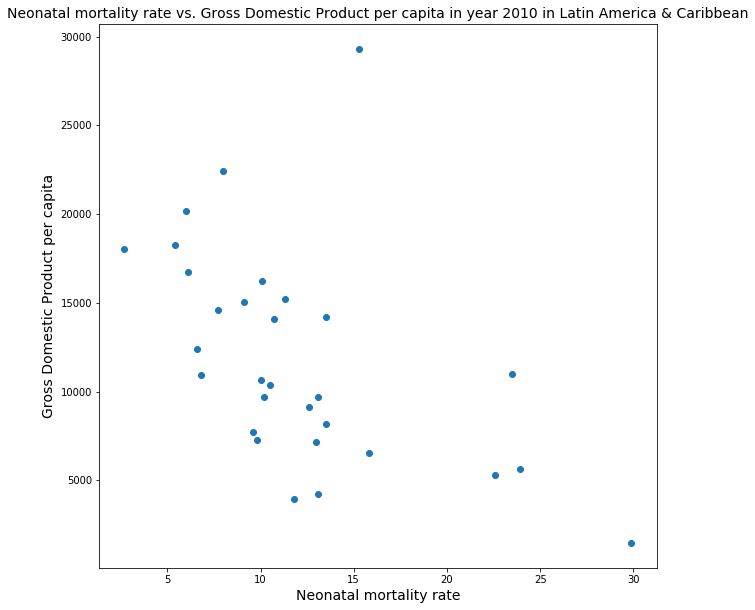

In [15]:
#figure size is set
plt.figure(figsize = (10, 10))

#new data frame only for the Latin America & Caribean region
year2010LAC = year2010[year2010.region == "Latin America & Caribbean"]

#data is plotted
plt.scatter(year2010LAC.neonat_mortal_rate, year2010LAC.gdp_percap)

#title is added
plt.title("Neonatal mortality rate vs. Gross Domestic Product per capita in year 2010 in Latin America & Caribbean", fontsize=14)

#x and y labels are added
plt.ylabel("Gross Domestic Product per capita", fontsize=14)
plt.xlabel("Neonatal mortality rate", fontsize=14)

#scatterplot is displayed
plt.show()

Now let's compare the data in the Latin America and Caribbean region to the Sub-Saharian Africa region. Make a new plot illustrating the trends in **neonat_mortal_rate** vs. **gdp_percap** in **year 2010** in both regions. Make sure to use different colors/markers for the two regions, and add a clear legend to your graph.

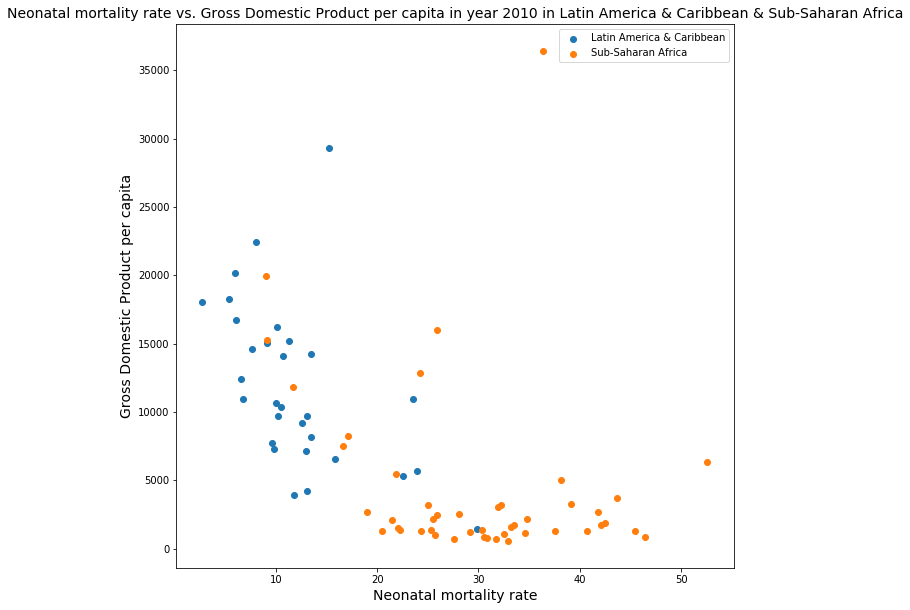

In [16]:
#figure size is set
plt.figure(figsize = (10, 10))

#new data frame only for the Sub-Saharian Africa region
year2010SSA = year2010[year2010.region == "Sub-Saharan Africa"]

#data is plotted
plt.scatter(year2010LAC.neonat_mortal_rate, year2010LAC.gdp_percap, label = "Latin America & Caribbean")
plt.scatter(year2010SSA.neonat_mortal_rate, year2010SSA.gdp_percap, label = "Sub-Saharan Africa")

#legend
plt.legend(loc="best")

#title is added
plt.title("Neonatal mortality rate vs. Gross Domestic Product per capita in year 2010 in Latin America & Caribbean & Sub-Saharan Africa", fontsize=14)

#x and y labels are added
plt.ylabel("Gross Domestic Product per capita", fontsize=14)
plt.xlabel("Neonatal mortality rate", fontsize=14)

#scatterplot is displayed
plt.show()

## Conclusion 4

In [17]:
#Generally, the higher the GDP per Capita, the lower the Neonatal mortality rate for both Latin America & Caribbean and Sub-Saharan Africa. 
#Latin America & Caribbean generally has higher GDP per Capita and lower Neonatal mortality rates while Sub-Saharan Africa generally has 
#lower GDP per Capita and higher Neonatal mortality rates when compared to the Latin America & Caribbean region.

Compare and contrast the trends in the data you observed for Latin America & Caribbean and Sub-Saharan Africa.